# 6 THE BEST ESTIMATOR - MODELO BASE - INTERPRETACIÓN DE LOS DATOS (Fx)

Queremos poder interpretar los datos del modelo mediante una formula para exportarla. Vamos a poner a competir a los siguientes modelos.

- Ridge Classifier
- Logistic Regression
- MultinomialNB



## MODELAR ALGORITMO DE CLASIFICACIÓN

## IMPORTACIÓN DE PAQUETES

In [144]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Crear train and test
from sklearn.model_selection import train_test_split

#Modelos seleccionados por LazyPredict
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Optimizar modelos
from sklearn.model_selection import GridSearchCV

#Métricas de evaluación
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

import scikitplot as skplt

#Crear Pipeline

from sklearn.pipeline import Pipeline

import cloudpickle

import warnings
warnings.filterwarnings("ignore")

## IMPORTACIÓN DE DATOS

### CARGAR LOS DATOS

In [145]:
df = pd.read_pickle('../../02_Datos/03_Trabajo/df_tablon_oe.pickle')
df.head()

,industrial_risk_oe,management_risk_oe,financial_flexibility_oe,credibility_oe,competitiveness_oe,operating_risk_oe,target
0,0.0,0.0,1.0,1.0,1.0,0.0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,0
2,2.0,2.0,2.0,2.0,2.0,2.0,0
3,0.0,0.0,2.0,2.0,2.0,0.0,0
4,1.0,1.0,2.0,2.0,2.0,1.0,0


## SEPARAR PREDICTORAS Y TARGET

In [146]:
x = df.drop(columns= 'target').copy()
y = df.target.copy()

In [147]:
x.head()

,industrial_risk_oe,management_risk_oe,financial_flexibility_oe,credibility_oe,competitiveness_oe,operating_risk_oe
0,0.0,0.0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,2.0,2.0,2.0,2.0,2.0,2.0
3,0.0,0.0,2.0,2.0,2.0,0.0
4,1.0,1.0,2.0,2.0,2.0,1.0


In [148]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## MODELIZAR

### RESERVAR LOS DATASET DE ENTRENAMIENTO Y VALIDACIÓN

In [149]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.3, random_state= 42)

### CREAR PIPE Y EL DICCIONARIO CON LOS ALGORITMOS, PARÁMETROS Y VALORES

In [150]:
pipe = Pipeline([('algoritmo', LogisticRegression())])

grid = [
            {
                'algoritmo' : [RidgeClassifier()]
            },

            {
                'algoritmo' : [RidgeClassifierCV()]
            },

            {
                'algoritmo' : [LogisticRegression()]
            },

            {
                'algoritmo' : [MultinomialNB()]
            }
        ]

### OPTIMIZAR LOS HIPERPARÁMETROS

In [151]:
grid_search = GridSearchCV(estimator= pipe,
                           param_grid= grid,
                           cv = 5,
                           scoring= 'roc_auc',
                           n_jobs= -1,
                           verbose=0)


In [152]:
modelo = grid_search.fit(train_x, train_y)
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.014670,0.002945,0.005985,0.001092,RidgeClassifier(),{'algoritmo': RidgeClassifier()},1.000000,1.0,1.000000,1.000000,1.0,1.000000,0.000000,1
2,0.008387,0.001361,0.004988,0.000894,RidgeClassifierCV(),{'algoritmo': RidgeClassifierCV()},1.000000,1.0,1.000000,1.000000,1.0,1.000000,0.000000,1
3,0.008188,0.000400,0.004189,0.000399,LogisticRegression(),{'algoritmo': LogisticRegression()},1.000000,1.0,1.000000,1.000000,1.0,1.000000,0.000000,1
0,0.006857,0.006498,0.005557,0.003328,DecisionTreeClassifier(),{'algoritmo': DecisionTreeClassifier()},0.875000,1.0,1.000000,0.944444,1.0,0.963889,0.049379,4
4,0.004389,0.000488,0.003591,0.000798,MultinomialNB(),{'algoritmo': MultinomialNB()},0.972222,1.0,0.888889,0.925926,1.0,0.957407,0.043666,5


In [153]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo', RidgeClassifier())])

In [154]:
modelo.best_params_

{'algoritmo': RidgeClassifier()}

In [155]:
modelo.best_score_

1.0

### GUARDAR MODELO.BEST_ESTIMATOR Y PARÁMETROS

In [156]:
modelo_best_estimator = modelo

### Guardar modelo, parámetros y score

In [157]:
m_best_estimator = str(modelo.best_estimator_[0])
m_best_estimator = m_best_estimator.split('(')[0]
m_best_params = str(modelo.best_params_)
m_best_score = str(modelo.best_score_)

## EVALUAR

### PRECEDIR Y EVALUAR SOBRE EL TRAIN

#### Predecir sobre el train

In [158]:
pred = modelo.best_estimator_.predict(train_x)

### Evaluar sobre el Train

In [159]:
t_roc_auc = roc_auc_score(train_y, pred)
t_accuracy = accuracy_score(train_y, pred)
t_report = classification_report(train_y, pred)

print(f"Roc AUC: {t_roc_auc}")
print(f"Accuracy: {t_accuracy}")
print(f"Classification Report:\n{t_report}")

Roc AUC: 1.0
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        18

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



### PREDECIR Y EVALUAR SOBRE LA VALIDACIÓN

#### Predecir sobre la validación

In [160]:
pred = modelo.best_estimator_.predict(val_x)
#pred_proba = modelo.best_estimator_.predict_proba(val_x)[:,1]
pred_proba = 'N/A'

#### Evaluar sobre la validación

In [161]:
#v_roc_auc_proba = roc_auc_score(val_y, pred_proba)
v_roc_auc = roc_auc_score(val_y, pred)
v_accuracy = accuracy_score(val_y, pred)
v_report = classification_report(val_y, pred)

#print(f"Roc AUC_proba: {v_roc_auc_proba}")
print(f"Roc AUC: {v_roc_auc}")
print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:{v_report}")

Roc AUC: 1.0
Accuracy: 1.0
Classification Report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         7

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



## REPORTING DEL MODELO

Matrix de Confusión MultiClass

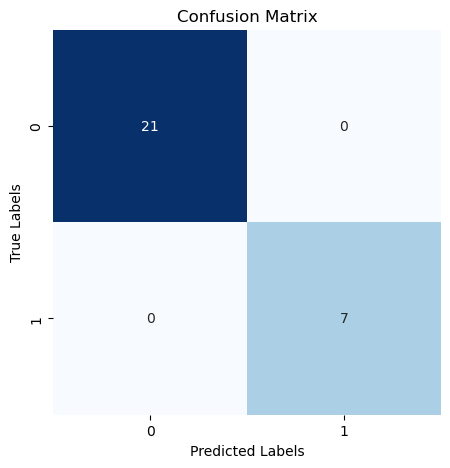

In [164]:
# Calcular la matriz de confusión
cm = confusion_matrix(val_y, pred)


# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Configurar etiquetas y título del gráfico
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix");


### Precision-Recall

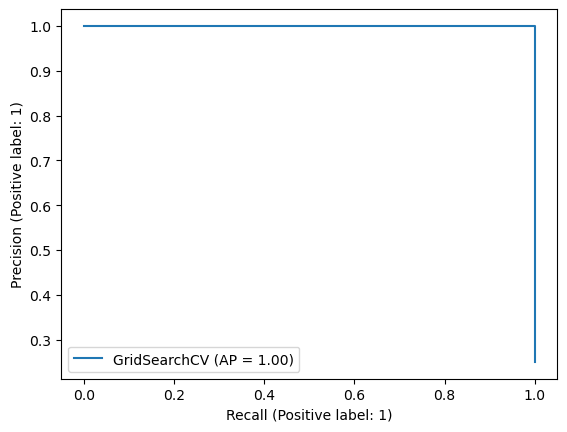

In [165]:
PrecisionRecallDisplay.from_estimator(modelo_best_estimator, val_x, val_y)

El mejor best_threshold: 1


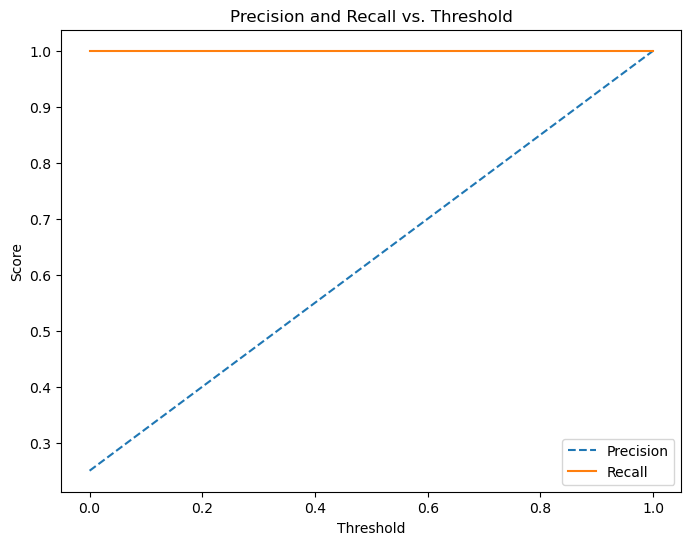

In [166]:
# Calcula la curva de precisión y recall para diferentes umbrales de corte
precision, recall, thresholds = precision_recall_curve(val_y, pred)

# Grafica la relación entre la precisión y el recall en función del umbral de corte
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', linestyle='--')
plt.plot(thresholds, recall[:-1], label='Recall', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision and Recall vs. Threshold')

# Encuentra el umbral que maximiza F1-score (o ajusta según tus necesidades)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("El mejor best_threshold:", best_threshold)

### ROC Chart

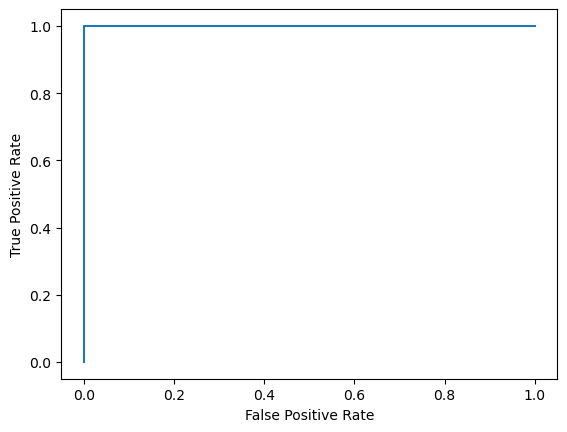

In [167]:
y_score = modelo.best_estimator_.decision_function(val_x)
fpr, tpr, _ = roc_curve(val_y, y_score, pos_label=modelo.best_estimator_.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el mejor estimador

In [168]:
version_estimator = '_v1'
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

'RidgeClassifier_v1.pickle'

In [169]:
m_best_estimator

'RidgeClassifier'

In [170]:
ruta_pipe_entrenamiento = '../../04_Modelos/Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo_best_estimator, file)


In [171]:
# Añadir comentarios sobre el modelo y definimos predictoras y target

comentarios = "Gridsearch con modelos bases - Intepretar resultado"
x_columns = list(x.columns)
y_target = y.name


In [172]:
#Cargamos la lista con los resultados
resultado  = {'m_Best_estimator': m_best_estimator,
               'm_Best_paramans' : m_best_params,
               'm_Best_Score': m_best_score, 
               't_accuracy': t_accuracy, 
               't_report': t_report, 
               'v_roc_auc_proba': 'n/a',
               'v_roc_auc': v_roc_auc,
               'v_accuracy': v_accuracy, 
               'v_report': v_report, 
               'comentarios': comentarios,
               'predictoras_X': x_columns,
               'target_y': y_target
            }
resultado= pd.Series(resultado,name=nombre_best_estimator)
resultado

m_Best_estimator                                      RidgeClassifier
m_Best_paramans                      {'algoritmo': RidgeClassifier()}
m_Best_Score                                                      1.0
t_accuracy                                                        1.0
t_report                          precision    recall  f1-score   ...
v_roc_auc_proba                                                   n/a
v_roc_auc                                                         1.0
v_accuracy                                                        1.0
v_report                          precision    recall  f1-score   ...
comentarios         Gridsearch con modelos bases - Intepretar resu...
predictoras_X       [industrial_risk_oe, management_risk_oe, finan...
target_y                                                       target
Name: RidgeClassifier_v1.pickle, dtype: object

In [173]:
df_best = pd.read_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx',index_col=0)


In [174]:
df_best = pd.concat([df_best, resultado], ignore_index= False,axis=1)
df_best.to_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx')

**CONCLUSIÓN**: Vemos que el modelo ha dado muy buenos resultados para los datos de entrenamiento como los de validación. 

**PRÓXIMOS PASOS:**

Realizaremos el modelo definitivo con este modelo.